# Twitter Sentiment Analysis 

## Overview

In the modern digital era, social media platforms like Twitter have emerged as influential channels for obtaining immediate customer feedback and viewpoints. It is crucial for businesses to comprehend the sentiment conveyed by customers regarding particular brands and products. This understanding allows companies to make well-informed choices, improve customer contentment, and uphold a favorable brand image.

The objective of this project is to create a sentiment analysis model designed specifically for evaluating Twitter data associated with Google, Apple, and various other products.

## Problem Statement

As a consulting firm, Twitter has entrusted us with the responsibility of constructing a model capable of assessing the sentiment expressed in a Tweet by analyzing its content. This model should accurately classify Twitter sentiments regarding Apple and Google products into categories of positivity, negativity, or neutrality. The primary objective is to extract valuable insights from public sentiment, enabling businesses to make well-informed decisions in shaping their strategic approaches and enhancing overall customer satisfaction.

## Data Understanding

In this project, I made use of a dataset sourced from CrowdFlower through Data.world, containing around 9,000 tweet sentiments regarding Apple and Google products. The dataset encompasses various columns, including tweet_text, emotion_in_tweet_is_directed_at, and is_there_an_emotion_directed_at_a_brand_or_product.
My primary goal is to create a sentiment analysis model capable of effectively categorizing tweets into positive, negative, or neutral sentiment categories.
#### Objectives for the project:

1. To develop a binary classifier that can classify tweets into positive or negative sentiment categories. This will serve as a proof of concept and provide a foundation for further analysis. The classifier will be a Logistic regression model and the benchmark accuracy will be 85%.
2. To expand to a multiclass classifier, thereby incorporating the neutral tweets to create a multiclass classifier that can accurately classify tweets as positive, negative, or neutral. This will provide a more comprehensive sentiment analysis of the tweets. The classifier will be a XGBoost model and MultinomialNB the benchmark accuracy will be 70%. 
3. To compare sentiment between Apple and Google products by analyzing the sentiment distribution of tweets mentioning Apple,  Google, and other products.

## Data Preparation

To prepare the data, I performed various preprocessing steps. 

These included; removing duplicates, handling missing values by filling them with "none" for the emotion_in_tweet_is_directed_at column, and dropping the row with a missing tweet_text. We also employed tokenization, lowercase conversion, stopword removal, and lemmatization to refine the text data.

### **Modelling**

The packages/libraries utilized for data preparation and analysis included NLTK, sklearn, and pandas. 

* NLTK was used for tokenization, stopword removal, and lemmatization. 
* Sklearn's CountVectorizer  was employed for vectorization. 
* Pandas was used for data manipulation and handling missing values.

For modeling, I employed logistic regression as the binary classifier to classify tweets into positive or negative sentiment categories. As a benchmark, I aimed for an accuracy of 70%. 

In addition, I expanded the model to a multiclass classifier to include the neutral sentiment category.

### **Model Evaluation**

To evaluate the performance of the final model, I employed accuracy. This metric provided insight into the model's ability to correctly classify instances and predict positive and negative sentiment.

Accuracy is a commonly used metric for evaluating sentiment analysis models because it provides a straightforward measure of the overall performance. In sentiment analysis, the primary goal is to classify a given text or document into positive, negative, or neutral sentiment categories accurately.
Accuracy, in this context, represents the proportion of correctly classified instances compared to the total number of instances. It gives a clear indication of how well a sentiment analysis model is able to predict sentiment labels correctly across the entire dataset.

In conclusion, the sentiment analysis model developed using logistic regression demonstrated satisfactory performance in classifying tweet sentiments. The pre-processing steps and modeling choices contributed to accurate predictions and meaningful insights. However, limitations such as missing values and data quality issues should be considered when interpreting the results. Recommendations include further refining the model and expanding the dataset for improved sentiment analysis accuracy

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.metrics import accuracy_score

print('successfully imported libraries....')

[nltk_data] Downloading package punkt to C:\Users\Derrick
[nltk_data]     Masungo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Derrick
[nltk_data]     Masungo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Derrick
[nltk_data]     Masungo\AppData\Roaming\nltk_data...


successfully imported libraries....


## Loading the Dataset

In [5]:
# loading and previewing the dataset
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Statiscal Description of the dataset

In [9]:
# class to describe dataset

class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

In [10]:
# creating an instance of the class describer
describe_df = Describer(data)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 9093 rows
	* 3 columns 



In [11]:
# print summary infomation on the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None 



* The dataset has 3 columns  namely:tweet_text, emotion_in_tweet_is_directed_at ,is_there_an_emotion_directed_at_a_brand_or_product

* The  dataset has 9093 rows

* All the  dataset's columns  datatypes are objects

## Data Preparation

In [12]:
#  Defined a function to check for  missing values

# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

identify_missing_values(data)

The Data has missing values.


In [13]:
# Defined a function to display  the missing values

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(data)


,Missing Values,Percentage(%)
emotion_in_tweet_is_directed_at,5802,0.638073
tweet_text,1,0.000110


In [14]:
# dropping missing row in tweet_text

data.dropna(axis=0,subset=['tweet_text'],inplace=True)

In [15]:
# confirmation
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

In [16]:
# replacing null values in recipient with none
data['emotion_in_tweet_is_directed_at'].fillna('none', inplace =True)

In [17]:
# confirming I replaced the 'nan' with 'none'
data['emotion_in_tweet_is_directed_at'].value_counts()

none                               5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [18]:
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                       False
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

* I discovered that there is ```0.01%``` missing values in **tweet_text** column and  ```63.81%``` missing values in **emotion_in_tweet_is_directed_at** column.

* I replaced the missing values in the ```emotion tweet is directed at column``` with none for computational purposes and dropped the missing valuesin the ```tweet text```   column

In [19]:
# Defined a function to check for duplicates

# Duplicated entries
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(data)

The Data has 22 duplicated rows.
This constitutes 0.242% of the data set.


In [20]:
#  Defined a function to handle the duplicates 

def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(data)

    return confirm 


remove_duplicated_rows(data)

The Data has no duplicates


> I found out that the **tweet text** column had 22 duplicates ```( 0.242% )``` and went ahead and  dropped  them.

In [21]:
# renaming the  long  column nmaes
data = data.rename(columns={'emotion_in_tweet_is_directed_at':'recipient',
                    'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})
data.head()

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


I renamed  the column ```emotion_in_tweet_is_directed_at``` to ```recipient``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```emotion``` to enhance clarity and facilitate their usage in my subsequent computation

# Explaratory Data Analysis

* I conducted Univariate and Bivariate analysis of the sentiments and created visualizations to see how they relate with each other and individually.

### Univariate Analysis

* Plotted  a count plot to show the distribution of the column `emotion`

No emotion toward brand or product    59.261301
Positive emotion                      32.745314
Negative emotion                       6.273429
I can't tell                           1.719956
Name: emotion, dtype: float64


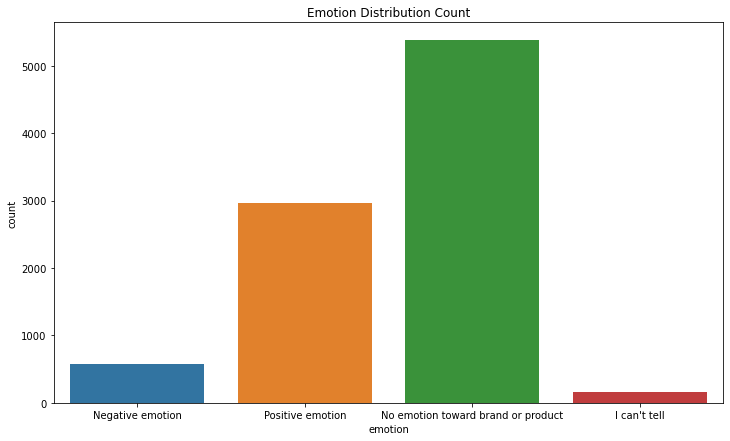

In [105]:
# checking the distribution of emotions
percentage = data['emotion'].value_counts(normalize=True)
print(percentage * 100)

# count plot
plt.figure(figsize=(12, 7))
sns.countplot(data['emotion'])
plt.title('Emotion Distribution Count')

plt.savefig('Distribution of emotion column.png')
plt.show();

 I found out that majority of  people had  ```No emotion toward brand or product``` at ```59.26%``` followed by people with ```Positive emotions ``` at ```32.75%```

```I can't tell``` makes up less than ```2%``` of the dataset, and doesn't offer much more information in the way of word significance than the tweets labeled No emotion toward brand or product.

### Bivariate analysis
I plotted a bar plot to visualize the distribution of sentiments `emotion` relative to the recipient

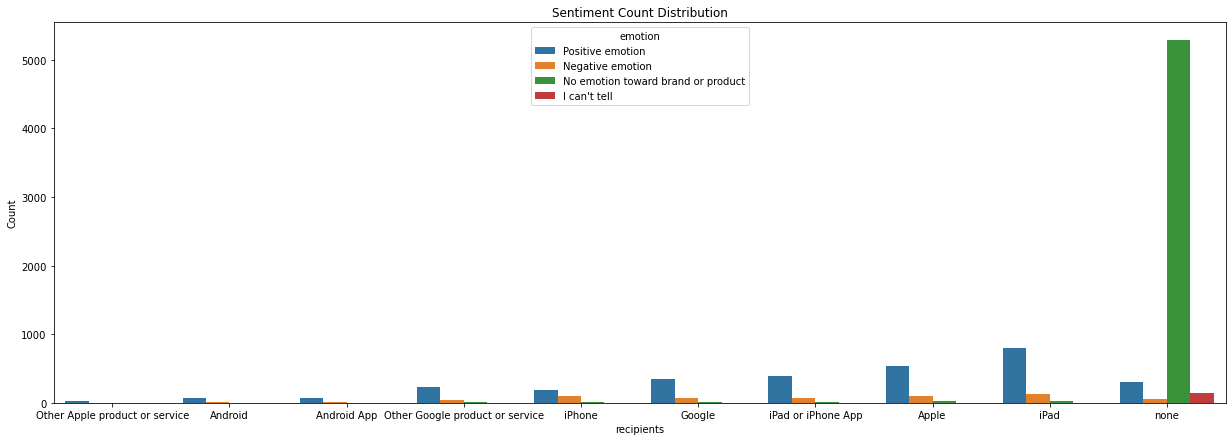

In [23]:
#  sentiment distribution product-wise
recipient_group = data.groupby('recipient')['emotion'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = recipient_group.groupby('recipient')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='recipient', y='count', hue='emotion', data=recipient_group, order=ascending_order)
plt.xlabel('recipients')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()

From the graph above  ```Ipad```  had the ```highest positive emotions``` followed by ```Apple```

From the observation above since we see similar product brand names so  i went ahead and  mapped the products to their brand 
### Mapping products to Brands 


In [24]:
# value counts of recipient column
data['recipient'].value_counts()

none                               5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: recipient, dtype: int64

In [25]:
# overall brand distribution
# feature engineering
data['brand'] = data['recipient'].map({'Other Apple product or service': 'Apple', 
                                           'Android': 'Google',
                                           'Android App': 'Google',
                                           'Other Google product or service ': 'Google',
                                           'iPhone': 'Apple', 
                                           'Google':'Google',
                                           'iPad or iPhone App': 'Apple',
                                           'Apple':'Apple',
                                           'iPad':'Apple',
                                           'none': 'none'})

In [26]:
# confirm brand column 
data.head(5)

,tweet_text,recipient,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google


## Brand Distributions

#### **Univariate Analysis**

none      65.945084
Apple     27.389769
Google     6.665148
Name: brand, dtype: float64


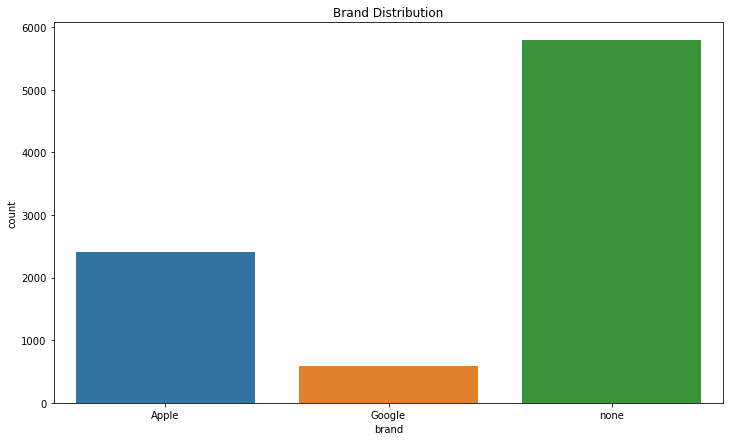

In [27]:
# checking the distribution of brand sentiment
percentage = data['brand'].value_counts(normalize=True)
print(percentage * 100)

# count plot
plt.figure(figsize=(12, 7))
sns.countplot(data['brand'])
plt.title('Brand Distribution')
plt.show();

From the graph above Majority of people had not specified the brand, and for those who did, ```Apple``` had the highest brand feedback as compared to ```Google```

#### **Bivariate analysis**
I plotted a bar plot to visualize the distribution of sentiments ***'emotion'*** relative to the ***Brand*** 

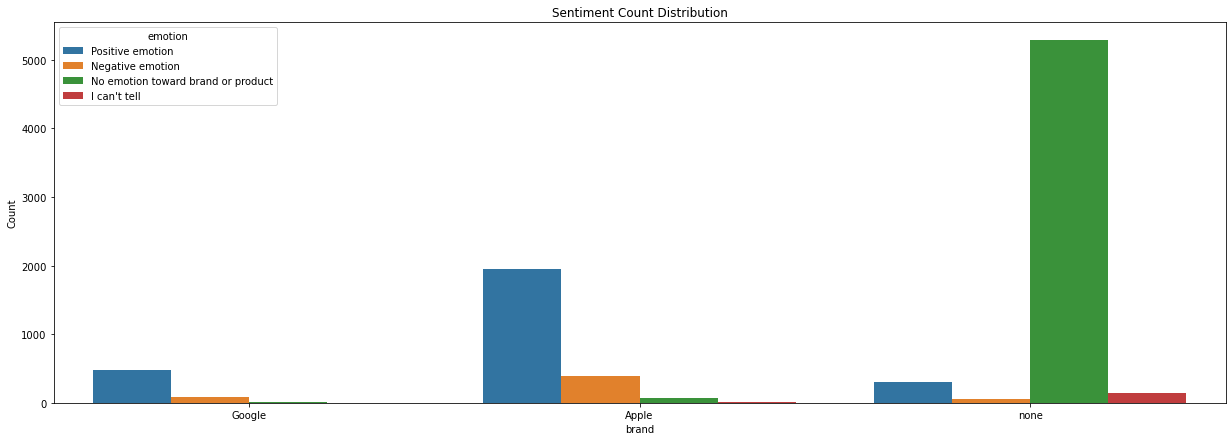

In [28]:
# Visualizing sentiment distribution brand-wise
brand_group = data.groupby('brand')['emotion'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = brand_group.groupby('brand')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='brand', y='count', hue='emotion', data=brand_group, order=ascending_order)
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()


From the graph above **Apple** had the highest ```positive emotions``` compared to **Google**

## Data Preprocessing

In this section I will; 

* Convert the tweet text to lower case
* Remove html tags 
* Remove the Url 
* Expand the contractions 
* Remove the punctuations
* Tokenize
* Remove stopwords 
* Lemmatize the tweet

So as to prepare the data for modeling.

In [29]:
# Displaying the columns 
data.columns

Index(['tweet_text', 'recipient', 'emotion', 'brand'], dtype='object')

### Changing the text to lowercase

In [31]:
# Convert the text in the 'tweet_text' column to lowercase
data['tweet_text'] = data['tweet_text'].str.lower()

# Display the first 5 rows of the DataFrame
data.head(5)

,tweet_text,recipient,emotion,brand
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Google


### Removing Html tags and URL

In [32]:
# Access the 'tweet_text' value at index 14 in the DataFrame
data['tweet_text'][14]

'great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l'

In [33]:
# Defined a function to remove HTML tags 
def remove_html(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', review)

# Apply the 'remove_html' function to the 'tweet_text' column in the DataFrame
data['tweet_text'] = data['tweet_text'].apply(remove_html)


In [34]:
# Defined a function for removing URL and @ sign
def preprocess_text_removingq_URLand_atsign(text):
    # Remove URLs
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'@[^\s]+', 'user', clean_text)
    # Other preprocessing steps like removing punctuation, converting to lowercase, etc.
    # ...
    return text

data['tweet_text'] = data['tweet_text'].apply(preprocess_text_removingq_URLand_atsign)

In [35]:
# confirming  if the url has been replaced with an empty
data['tweet_text'][14]

'great #sxsw ipad app from user '

In [36]:
data.head()

,tweet_text,recipient,emotion,brand
0,.user i have a 3g iphone. after 3 hrs tweeting...,iPhone,Negative emotion,Apple
1,user know about user ? awesome ipad/iphone app...,iPad or iPhone App,Positive emotion,Apple
2,user can not wait for #ipad 2 also. they shoul...,iPad,Positive emotion,Apple
3,user i hope this year's festival isn't as cras...,iPad or iPhone App,Negative emotion,Apple
4,user great stuff on fri #sxsw: marissa mayer (...,Google,Positive emotion,Google


### Expanding Words
converted abbreviated words to their full form 

In [38]:
# expanding the contractions (is-nots)
import contractions
#from nltk.stem import WordNetLemmatizer

def expand(text):
    # Expand contractions
    expanded_text = contractions.fix(text)

    return expanded_text

data['tweet_text'] = data['tweet_text'].apply(expand)

In [42]:
data.tweet_text[3]

"user i hope this year's festival is not as crashy as this year's iphone app. #sxsw"

### Removing Punctuations

In [43]:
# Defined a string containing punctuation characters to exclude
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [44]:
# Defined a function to remove punctuations
def remove_punctuations(tweet):
    return tweet.translate(str.maketrans('','',exclude))

In [45]:
# Apply a function to remove punctuations from the 'tweet_text' column
data['tweet_text'] = data['tweet_text'].apply(remove_punctuations)

# Display the first few rows of the modified DataFrame
data.head()

,tweet_text,recipient,emotion,brand
0,user i have a 3g iphone after 3 hrs tweeting a...,iPhone,Negative emotion,Apple
1,user know about user awesome ipadiphone app t...,iPad or iPhone App,Positive emotion,Apple
2,user can not wait for ipad 2 also they should ...,iPad,Positive emotion,Apple
3,user i hope this years festival is not as cras...,iPad or iPhone App,Negative emotion,Apple
4,user great stuff on fri sxsw marissa mayer goo...,Google,Positive emotion,Google


In [46]:
data.tweet_text[20]

'need to buy an ipad2 while i am in austin at sxsw not sure if i will need to q up at an austin apple store'

### Tokenization and Removing Stopwords

In [47]:
# tokenize the tweets
def tokenize_text(tweet):
    return word_tokenize(tweet)

data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

,tweet_text,recipient,emotion,brand
0,"[user, i, have, a, 3g, iphone, after, 3, hrs, ...",iPhone,Negative emotion,Apple
1,"[user, know, about, user, awesome, ipadiphone,...",iPad or iPhone App,Positive emotion,Apple
2,"[user, can, not, wait, for, ipad, 2, also, the...",iPad,Positive emotion,Apple
3,"[user, i, hope, this, years, festival, is, not...",iPad or iPhone App,Negative emotion,Apple
4,"[user, great, stuff, on, fri, sxsw, marissa, m...",Google,Positive emotion,Google


In [48]:
# Removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tweet):
    # Use list comprehension for efficient list creation
    new_tweet = [word for word in tweet if word not in stop_words]
    return " ".join(new_tweet)

# Apply the function to the 'review' column
data['tweet_text'] = data['tweet_text'].apply(remove_stopwords)
data.head()

,tweet_text,recipient,emotion,brand
0,user 3g iphone 3 hrs tweeting riseaustin dead ...,iPhone,Negative emotion,Apple
1,user know user awesome ipadiphone app likely a...,iPad or iPhone App,Positive emotion,Apple
2,user wait ipad 2 also sale sxsw,iPad,Positive emotion,Apple
3,user hope years festival crashy years iphone a...,iPad or iPhone App,Negative emotion,Apple
4,user great stuff fri sxsw marissa mayer google...,Google,Positive emotion,Google


In [50]:
# Count the occurrences of each unique value in the 'emotion' column
data.emotion.value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: emotion, dtype: int64

### Words Distribution in Tweet Text

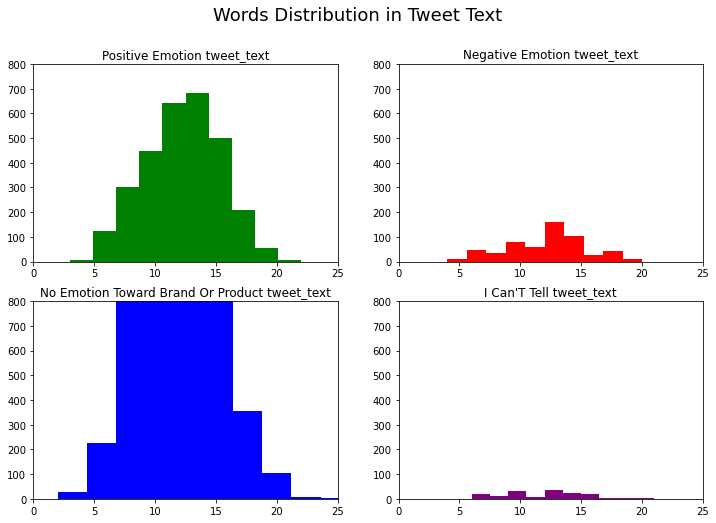

In [51]:
# Defined a function to generate and plot histograms for tweet text length

def generate_review_hist_plot(data, label, color, ax):
    tweet_len = data[data['emotion']==label].tweet_text.str.split().map(lambda x: len(x))
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 800)
    ax.hist(tweet_len, color=color)
    ax.set_title(f'{label.title()} tweet_text')

# Create subplots for different emotion categories
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
generate_review_hist_plot(data,'Positive emotion','green',ax[0,0])
generate_review_hist_plot(data,'Negative emotion','red',ax[0,1])
generate_review_hist_plot(data,'No emotion toward brand or product','blue',ax[1,0])
generate_review_hist_plot(data,"I can't tell",'purple',ax[1,1])

# Set the main title for the entire plot
fig.suptitle("Words Distribution in Tweet Text", fontsize=18)

# Display the plot
plt.show()

From the graph we can conclude that majority of the tweets in all the target emotions classes were 10-15 words long

### Re-tokenizing the Data

In [52]:
# re-tokenizing the data
data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

,tweet_text,recipient,emotion,brand
0,"[user, 3g, iphone, 3, hrs, tweeting, riseausti...",iPhone,Negative emotion,Apple
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive emotion,Apple
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,Apple
3,"[user, hope, years, festival, crashy, years, i...",iPad or iPhone App,Negative emotion,Apple
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive emotion,Google


In [53]:
# Access the third tweet_text in the data DataFrame
data.tweet_text[2]


['user', 'wait', 'ipad', '2', 'also', 'sale', 'sxsw']

I retokinized since after removing the stopwords the tweets were  no longer split as strings.

### Frequency Distribution after Removing Stopwords

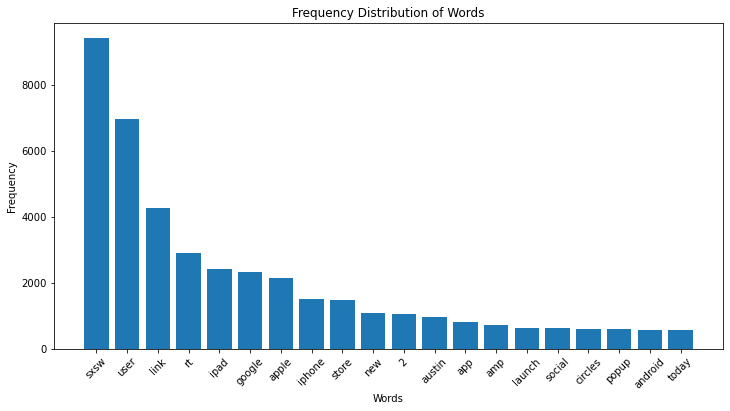

In [54]:
tweet_texts = data.tweet_text
# Flatten the list of tokens into a single list
all_tokens = [tweet for sublist in tweet_texts for tweet in sublist]

# Create the frequency distribution
freq_dist = FreqDist(all_tokens)

# Get the most common words
most_common = freq_dist.most_common(20)  # Example: Top 20 most common words

# Extract the words and frequencies
words, frequencies = zip(*most_common)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Words')
plt.xticks(rotation=45)
plt.show()

From the graph above I concluded that there is a high occurence of

* Venue **(south by south west)** specific words such as ```sxsw```

* Twitter specific words(**re-tweet** such as ```rt```

* Brand or product specific words such as ```iphone```

These words probably occur across  various sentiments and may not necessarily add any meaning, unless a majority of their occurence is associated with a particular emotion

### Lemmatization

In [55]:
# lemmatization - example cats - cat
# Create Lemmatizer instance
word_lem = WordNetLemmatizer()

#  Define a function to lemmatize words in a tweet
def lem_words(tweet):
    return [word_lem.lemmatize(word) for word in tweet]

In [56]:
# Apply the lem_words function to the 'tweet_text' column
data['tweet_text'] = data['tweet_text'].apply(lem_words)

# Display the first few rows of the 'tweet_text' column after lemmatization
data['tweet_text'].head()


0    [user, 3g, iphone, 3, hr, tweeting, riseaustin...
1    [user, know, user, awesome, ipadiphone, app, l...
2              [user, wait, ipad, 2, also, sale, sxsw]
3    [user, hope, year, festival, crashy, year, iph...
4    [user, great, stuff, fri, sxsw, marissa, mayer...
Name: tweet_text, dtype: object

In [57]:
# Displaying the updated Dataframe
data.head()

,tweet_text,recipient,emotion,brand
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative emotion,Apple
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive emotion,Apple
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,Apple
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,Apple
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive emotion,Google


### Removing the Emojis

Created a function that replaces emojis in tweet text with their corresponding meanings.

In [58]:
# Defining dictionary containing all emojis with their meanings.

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [59]:
# Defined a function to remove emojis and sequence of letters like heeeey)
def process(tweets):
    
    processed_tweet = []
    
    
    # Defining regex patterns.
    
    sequencePattern   = r"(.)\1\1+" #matches three or more consecutive occurrences of the same character.
    seqReplacePattern = r"\1\1"
    
    for tweet in tweets:
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])              
            # Replace 3 or more consecutive letters by 2 letter.
            tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        processed_tweet.append(tweet)
        
    return processed_tweet

In [60]:
# Apply the process(tweet) function to the 'tweet_text' column
data['tweet_text'] = data['tweet_text'].apply(process)
# Display the updated DataFrame after removing emojis
data.head()

,tweet_text,recipient,emotion,brand
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative emotion,Apple
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive emotion,Apple
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,Apple
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,Apple
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive emotion,Google


In [63]:
# Acessing the fourth  tweet_text in the data DataFrame
data.tweet_text[3]


['user', 'hope', 'year', 'festival', 'crashy', 'year', 'iphone', 'app', 'sxsw']

### vectorization
#### CountVectorization



In [66]:
# create instance 1 vectorizer
bow = CountVectorizer()
#create lemmatized_review column 
data['lemmatized_review'] = data['tweet_text'].str.join(" ")
x = bow.fit_transform(data['lemmatized_review'])

In [68]:
#checking feature names
feature_names = bow.get_feature_names()
feature_names


['02',
 '03',
 '0310',
 '0310apple',
 '0311',
 '031211',
 '031311',
 '031411',
 '031511',
 '0610',
 '10',
 '100',
 '100tc',
 '101',
 '1030',
 '103011p',
 '1045am3',
 '105',
 '105hrs',
 '106',
 '10am',
 '10k',
 '10mins',
 '10pm',
 '10x',
 '10x2',
 '11',
 '1100',
 '1100am',
 '1120',
 '1130',
 '115',
 '1154',
 '11am',
 '11bil',
 '11m',
 '11ntc',
 '11pm',
 '11quot',
 '11th',
 '12',
 '120',
 '120035959p',
 '1201am',
 '1223',
 '1230',
 '1230p',
 '1230pm',
 '1230pmpart',
 '1240',
 '125',
 '128',
 '12ab',
 '12am',
 '12b',
 '12bn',
 '12th',
 '13',
 '1300',
 '130230pm',
 '1315',
 '136',
 '13quot',
 '14',
 '1406',
 '140608',
 '14061408',
 '1413',
 '1415',
 '141st',
 '1422',
 '1443',
 '14day',
 '14th',
 '15',
 '150',
 '1500',
 '150m',
 '150mm',
 '157',
 '159',
 '15k',
 '15slides',
 '15to1',
 '16',
 '16162',
 '165',
 '169',
 '16gb',
 '16mins',
 '17',
 '175',
 '18',
 '1850',
 '188',
 '19',
 '1980s',
 '1985',
 '1986',
 '1986quot',
 '1986quotuser',
 '1990style',
 '1991',
 '1amp2',
 '1k',
 '1m',
 '1of'

## Feature Engineering



Here I label encoded the target feature to transform the values to numerical values.

In [69]:
# Instantiate labelencoder
le = LabelEncoder() # initializing the lib
#fit transform 
data['emotion_code'] = le.fit_transform(data.emotion)
le.classes_ # viewing the classes

array(["I can't tell", 'Negative emotion',
       'No emotion toward brand or product', 'Positive emotion'],
      dtype=object)

In [71]:
# A  preview to ensure encoding is done 
data.head()

,tweet_text,recipient,emotion,brand,lemmatized_review,emotion_code
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative emotion,Apple,user 3g iphone 3 hr tweeting riseaustin dead n...,1
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive emotion,Apple,user know user awesome ipadiphone app likely a...,3
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,Apple,user wait ipad 2 also sale sxsw,3
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,Apple,user hope year festival crashy year iphone app...,1
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive emotion,Google,user great stuff fri sxsw marissa mayer google...,3


In [72]:
# Displaying the encoding scheme
data[['emotion', 'emotion_code']].head(15)

,emotion,emotion_code
0,Negative emotion,1
1,Positive emotion,3
2,Positive emotion,3
3,Negative emotion,1
4,Positive emotion,3
5,No emotion toward brand or product,2
7,Positive emotion,3
8,Positive emotion,3
9,Positive emotion,3
10,Positive emotion,3


## Modelling
### Baseline model

created a base model to identify if a tweet is 'Positive' or 'Negative'.
* LogisticRegression will be used for the classification.
* The normal preprocessing of vectorization and train test split will be implemented.

In [73]:
# created a copy of the original data so as to remove unwanted rows i.e. (not positive or negative)
data_copy = data.copy()

In [74]:
# Defined the values to drop
values_to_drop = [0, 2]

# Dropped rows that have the values in column 'B'
data_copy = data_copy[~data_copy['emotion_code'].isin(values_to_drop)]

In [76]:
# value counts of the emotion code
data_copy['emotion_code'].value_counts()

3    2970
1     569
Name: emotion_code, dtype: int64

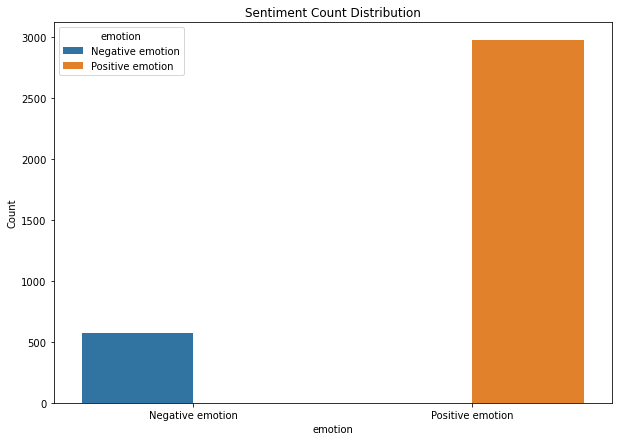

In [77]:
# Visualizing binary sentiment distribution emotion-wise
emotion_group = data_copy.groupby('emotion')['emotion_code'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = emotion_group.groupby('emotion')['count'].sum().sort_values().index

plt.figure(figsize=(10,7))
sns.barplot(x='emotion', y='count', hue='emotion', data=emotion_group, order=ascending_order)
plt.xlabel('emotion')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()

From the graph above it is clear that most of the sentiments were positive in nature.

### Vectorizing Data Copy
#### CountVectorizer

In [78]:
# create instance of vectorizer
bow2 = CountVectorizer()
data_copy['lemmatized_review'] = data_copy['tweet_text'].str.join(" ")
# our X
x2 = bow2.fit_transform(data_copy['lemmatized_review'])

In [79]:
# preview of the updated data
data.head()

,tweet_text,recipient,emotion,brand,lemmatized_review,emotion_code
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative emotion,Apple,user 3g iphone 3 hr tweeting riseaustin dead n...,1
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive emotion,Apple,user know user awesome ipadiphone app likely a...,3
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive emotion,Apple,user wait ipad 2 also sale sxsw,3
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative emotion,Apple,user hope year festival crashy year iphone app...,1
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive emotion,Google,user great stuff fri sxsw marissa mayer google...,3


### Spliting the data into training and test sets

In [80]:
#x = bow.fit_transform(data['lemmatized_review'])
# our y
y = data_copy['emotion_code']

In [82]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [84]:
# confirming  the shape

X_train.shape, y_train.shape


((2831, 5871), (2831,))

## logistic Regression

In [85]:
# instantiating model 1
log_reg = LogisticRegression(random_state=42)

In [86]:
# fitting the training sets

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [87]:
# Getting the predictions
y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

### Model Evaluation

In [88]:
# Compute the accuracy score of the model on the training data
print('train',accuracy_score(y_train, y_train_pred))

# Compute the accuracy score of the model on the test data
print('test',accuracy_score(y_test, y_pred))

train 0.9699752737548569
test 0.903954802259887


In [89]:
# Compute and print the classification report of the model on the test data
# 'y_test' is the actual labels for the test data
# 'y_pred' is the predicted labels by the model for the test data
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.84      0.44      0.58       106
           3       0.91      0.99      0.95       602

    accuracy                           0.90       708
   macro avg       0.87      0.71      0.76       708
weighted avg       0.90      0.90      0.89       708



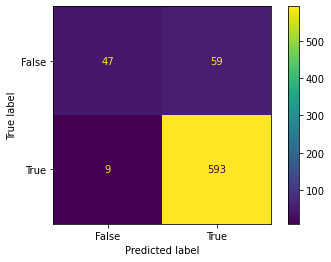

In [90]:
# Confusion Matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


 The baseline model  performed as follows;
> * Training accuracy: 96%
> * Testing accuracy: 90%

* The accuracy means that the model can predict with an accuracy of 90% whether a tweet is positive or negative.
* The current model is fit for prediction since it is generalizing well to new data even with high accuracy.

### Multiclass Classifier
* Here I worked with the original dataset to build a multiclass classifier
  MultinomialNB and XGBoost model will be tested.

In [91]:
# target variable
y = data['emotion_code']

#### Splitting the data 

In [92]:
# splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
# InstatiatE the multi class model
multi_class = MultinomialNB()

# fitting the model to the training data
multi_class.fit(X_train_multi, y_train_multi)

MultinomialNB()

In [94]:
# Use the trained multi-class model to predict the labels for the test data
y_pred_multi = multi_class.predict(X_test_multi)

# Use the trained multi-class model to predict the labels for the training data
y_train_pred_multi = multi_class.predict(X_train_multi)

In [95]:
# Compute the accuracy score of the model on the training and test data

print('train',accuracy_score(y_train_multi, y_train_pred_multi))
print('test',accuracy_score(y_test_multi, y_pred_multi))

train 0.8036108048511577
test 0.6543550165380375


The model results are as follows
* Accuracy on the training set: 80%
* Accuracy on the testing set: 65%

The current model is not fit for prediction since it is not generalizing well to new data even with high accuracy. The model is overfitting.


## Linear SVC Model

In [96]:
from sklearn.svm import LinearSVC
# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           1       0.73      0.60      0.66       106
           3       0.93      0.96      0.95       602

    accuracy                           0.91       708
   macro avg       0.83      0.78      0.80       708
weighted avg       0.90      0.91      0.90       708



### Model evaluation

In [109]:
# Predict on the training data
y_pred_svm_train = svm.predict(X_train)

# Evaluate and print the classification report
print("Support Vector Machine (Training Data):")
print(classification_report(y_train, y_pred_svm_train))

Support Vector Machine (Training Data):
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       463
           3       1.00      1.00      1.00      2368

    accuracy                           1.00      2831
   macro avg       1.00      1.00      1.00      2831
weighted avg       1.00      1.00      1.00      2831



In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred_svm = svm.predict(X_test)

# Calculate and print the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Calculate and print the precision of the model on the test data
# Set the `average` parameter to 'macro' for macro-average precision score
precision = precision_score(y_test, y_pred_svm, average='macro')
print(f"Precision: {precision}")

# Calculate and print the recall of the model on the test data
# Set the `average` parameter to 'macro' for macro-average recall score
recall = recall_score(y_test, y_pred_svm, average='macro')
print(f"Recall: {recall}")

# Calculate and print the F1 score of the model on the test data
# Set the `average` parameter to 'macro' for macro-average F1 score
f1 = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score: {f1}")


Accuracy: 0.9067796610169492
Precision: 0.8297653958944282
Recall: 0.7819532376355545
F1 Score: 0.8028919972328614


Based on the model results for both training and  test data it performs better on the training data this implies that the model is overfitting and it is capturing noise and random fluctuations in the training set rather than the underlying patterns that generalize to new, unseen data.So i went further and tried to address this problem of overfitting by using regularization technique

In [119]:
# Defined the regularization parameter c
c = 0.5


# Support Vector Machine regularized
svm = LinearSVC(C=c)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Regularized:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Regularized:
              precision    recall  f1-score   support

           1       0.77      0.60      0.68       106
           3       0.93      0.97      0.95       602

    accuracy                           0.91       708
   macro avg       0.85      0.79      0.81       708
weighted avg       0.91      0.91      0.91       708



Regularized Linear SVM model exhibits improved generalization on the test data compared to the initial model. It achieves a higher F1-Score for both low and high-risk classes while maintaining a high level of precision and recall. This suggests that the regularization has helped mitigate overfitting, and the model is performing well on new, unseen data.

## XG Boost Model

In [98]:
# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train_multi, y_train_multi)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Evaluation

In [99]:
# Make predictions on the testing data
#predictions = xgb_classifier.predict(test_x)
y_pred_xgb =  xgb_classifier.predict(X_test_multi)
y_train_pred_xgb =  xgb_classifier.predict(X_train_multi)

In [100]:
# checking the accuracy
print('train',accuracy_score(y_train_multi, y_train_pred_xgb))
print('test',accuracy_score(y_test_multi, y_pred_xgb))

train 0.7848676957001103
test 0.685226019845645


The model performed like this
* Accuracy on the training set: 78%
* Accuracy on the testing set: 68%
* The accuracy means that the model can predict with an accuracy of 78% whether a tweet falls within the specified labels.
The model is not fit for prediction since it is overfitting.



## Resampling the Xgboost

In [102]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE()

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train_multi, y_train_multi)

# Now you can use the resampled data to train your model
xgb_classifier.fit(X_resampled, y_resampled)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
# Fit the model on the resampled training data
xgb_classifier.fit(X_resampled,y_resampled)

# Make predictions on the testing data
predictions = xgb_classifier.predict(X_test_multi)

# Evaluate the model
accuracy = accuracy_score(y_test_multi, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6786108048511577


Despite implementing resampling techniques to address class imbalance, the model's accuracy has not improved significantly. This suggests that other factors within the dataset may be limiting predictive performance.

* The binary logistic regression model perform better.
* Linear SVm is te model that performs best.
* For Multiclass XGBoost was better. 

# Limitation and Challenges 
- Class Imbalance Issue: The dataset suffers from class imbalance, where one sentiment class is dominant while others are underrepresented. This can result in biased models that are more accurate for the majority class but perform poorly on the minority classes. Addressing this issue is important to ensure fair and balanced sentiment analysis.

- Limited Dataset Size: The dataset used for sentiment analysis is relatively small, which can limit the model's ability to capture the full complexity of sentiments expressed in text. A larger and more diverse dataset would provide a broader representation of sentiments and improve the model's performance and generalization.

- Language Ambiguity and Sarcasm Detection: Language can be inherently ambiguous, and detecting sarcasm in text adds an extra layer of complexity. Sarcasm detection is challenging due to the subtleties and nuances involved. Developing robust strategies to handle language ambiguity and detect sarcasm is crucial for accurate sentiment analysis

# 7.Findings 
1. Most tweets were directed to None brand category. This may indicate that customers were not engaging with the brand.
2. Positive sentiments had the highest count compared to Negative sentiments, indicating that most people in general liked respective brands(Google and Apple)
3. Most of the positive tweets were directed to Apple brands 
4. In the field of sentiment analysis, one of the significant challenges is dealing with language ambiguity and sarcasm    detection. Natural language is complex and often subjective, making it difficult to accurately interpret sentiments from text. 
5. On average most of the tweets were 10-15 words long - more words increase ambiguity.
6. NLP is a difficult task to model accurately.

# 8.Recommendations
From the analysis I recommend that there be more customer engagement.

Probably check on this areas;

   * Churn ratio - rate at which customers discontinue their relationship with a product company within a given time period
   * Social media influencers through brand or product endorsement
   * Customer feedback - The brands can introduce a rating system to accurately capture the sentiments of their customers 

# 9. Next steps
- In our future work, we plan to explore advanced techniques such as incorporating attention mechanisms, using ensemble methods to further enhance the model's performance by incorporating domain-specific and fine-tuning the model on industry-specific datasets could improve its accuracy and adaptability.

- By considering these evaluation metrics, addressing limitations, and planning for future improvements, we aim to develop a robust NLP sentiment analysis solution that effectively captures sentiment


In [104]:
import joblib

# Save the trained model as a pickle file
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(xgb_classifier, 'xgb.pkl')


['xgb.pkl']